In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 2: Load the dataset
df = pd.read_csv("3ae033f50fa345051652.csv")
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [3]:
# Step 3: Clean and preprocess
df = df.dropna()  # remove missing values

# Convert numeric columns
cols_to_numeric = [
    'Battery Electric Vehicles (BEVs)', 
    'Plug-In Hybrid Electric Vehicles (PHEVs)', 
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total', 
    'Total Vehicles',
    'Percent Electric Vehicles'
]

# Remove commas and convert to int
for col in cols_to_numeric:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col])

# Convert Date to datetime features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year,Month
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50,2022,9
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57,2022,12
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03,2020,1
3,2022-06-30,Ferry,WA,Truck,0,0,0,3575,3575,0.00,2022,6
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19,2021,7


In [4]:
# Step 4: Encode categorical columns
label_cols = ['County', 'State', 'Vehicle Primary Use']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# Step 5: Define features and target
X = df[['County', 'State', 'Vehicle Primary Use', 'Year', 'Month',
        'Non-Electric Vehicle Total', 'Total Vehicles']]
y = df['Electric Vehicle (EV) Total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [8]:
# Step 7: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R-squared Score:", round(r2, 2))

Mean Squared Error: 41672.21
R-squared Score: 1.0


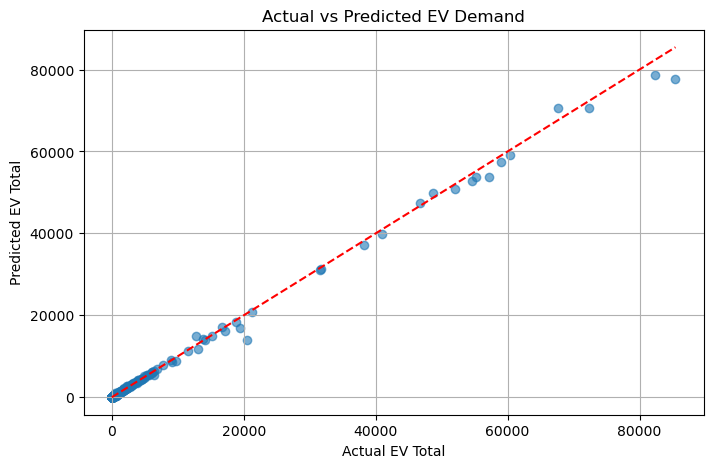

In [9]:
# Step 8: Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual EV Total")
plt.ylabel("Predicted EV Total")
plt.title("Actual vs Predicted EV Demand")
plt.grid(True)
plt.show()

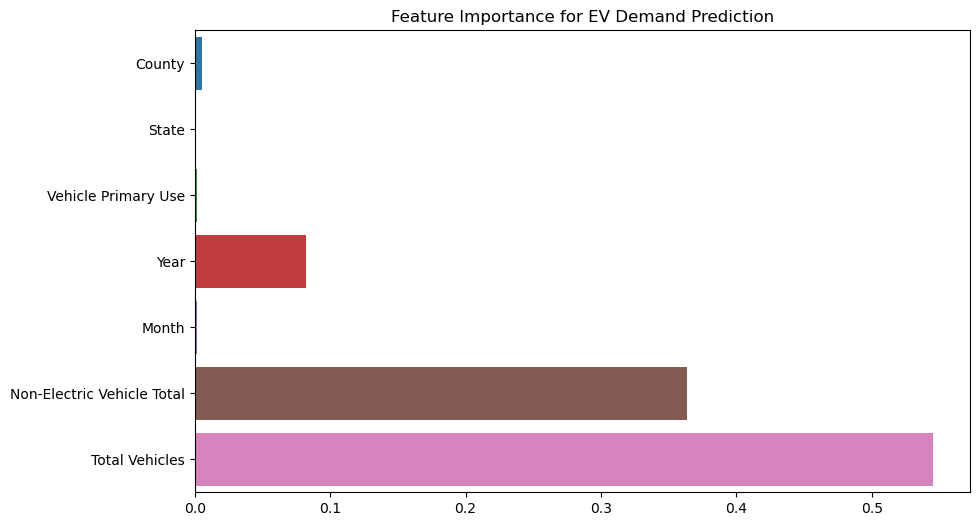

In [10]:
# Step 9: Feature Importance
feat_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=features)
plt.title("Feature Importance for EV Demand Prediction")
plt.show()